<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [1]:
import numpy as np  # numpy 패키지를 np 별칭으로 사용
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 패키지의 pyplot 모듈을 plt 별칭으로 사용
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

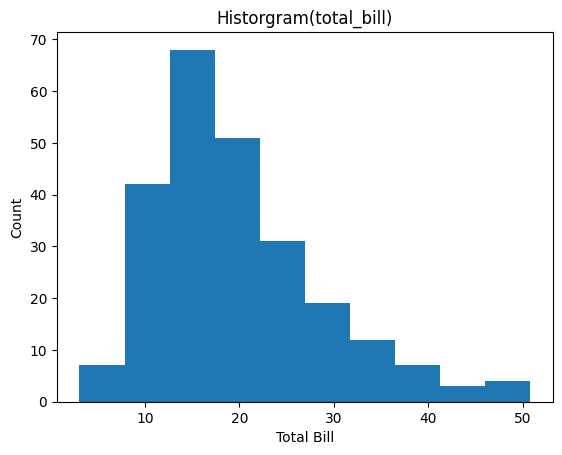

In [5]:
# 1. Figure 객체 생성
fig = plt.figure()

# 2. Figure 객체에 Subplot(들)을 추가
# Figure.add_subplot(nrows, ncols, index)
# - nrows: subplot의 행(row)의 개수
# - ncols: subplot의 열(column)의 개수
# - index: subplot의 인덱스(위치)
# axis = fig.add_subplot(1, 1, 1)

# Figure.add_subpolt(pos)
# - pos: '행/열/인덱스' 순서로 만들어진 3자리 숫자
axis = fig.add_subplot(111)

# 3. suplot에 그래프를 그림.
axis.hist(x=tips.total_bill)

# 4. 그래프의 옵션들을 설정
axis.set_title('Historgram(total_bill)')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기
plt.show()

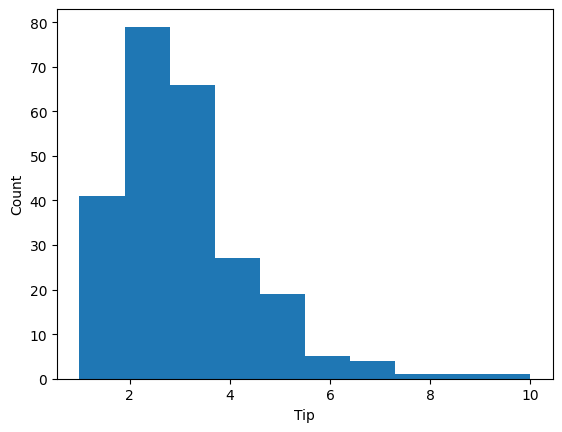

In [6]:
# 1. Figure 객체 생성 + Subplot 추가
fig, axis = plt.subplots()  # subplots의 파라미터 nrows, ncols의 기본값 1

# 2. Subplot에 그래프 그림
axis.hist(x=tips.tip)

# 3. 그래프 옵션
axis.set_xlabel('Tip')
axis.set_ylabel('Count')

# 4. 그래프 보여주기
plt.show()

1개의 Figure에 1개의 Subplot만 있는 경우에는 pyplot 모듈의 top-level 그래프 함수를 직접 이용할 수도 있음.

top-level 그래프 함수를 사용하면 Figure 생성과 Subplot 추가 코드를 작성할 필요가 없음.

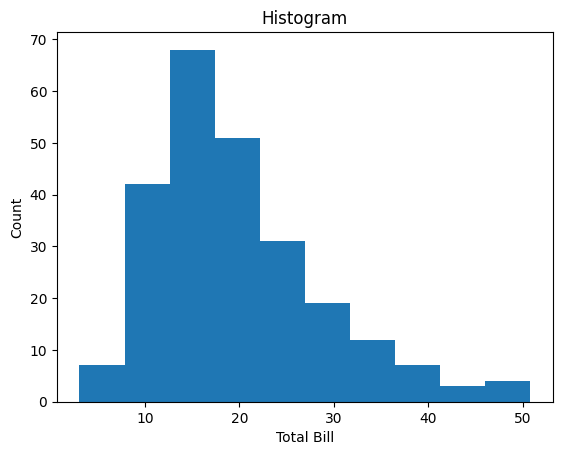

In [7]:
# pyplot 함수 호출 -> Figure 객체 생성, Subplot(Axex) 객체 생성, 그래프 작성
plt.hist(x=tips.total_bill)

# 옵션 설정 - pyplot 모듈의 함수 사용
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Histogram')

# 그래프 보여주기
plt.show()

*   1개의 Figure에 2개 Subplot을 위/아래로 배치(nrows 설정).
*   위쪽 Axes에는 total_bill 히스토그램을 작성.
*   아래쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

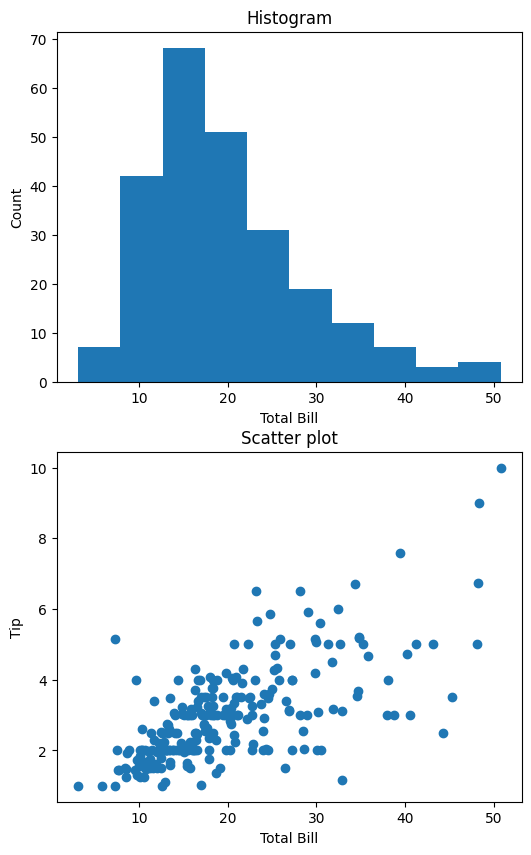

In [8]:
# 1. Figure 객체를 생성
fig = plt.figure(figsize=(6, 10))

# 2. Figure 객체에 Subplot들을 추가
axis1 = fig.add_subplot(2, 1, 1)  # 위쪽 Axes, add_subplot(211)와 동일.
axis2 = fig.add_subplot(212)  # 아래쪽 Axes, add_subplot(2, 1, 2)와 동일.

# 3. 그래프 작성
axis1.hist(x=tips.total_bill)
axis2.scatter(x=tips.total_bill, y=tips.tip)

# 4. 옵션
axis1.set_title('Histogram')
axis1.set_xlabel('Total Bill')
axis1.set_ylabel('Count')

axis2.set_title('Scatter plot')
axis2.set_xlabel('Total Bill')
axis2.set_ylabel('Tip')

# 5. 그래프 보여주기
plt.show()

*   1개의 Figure에 2개 Subplot을 좌우로 배치(ncols 설정).
*   왼쪽 Axes에는 total_bill 히스토그램을 작성.
*   오른쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

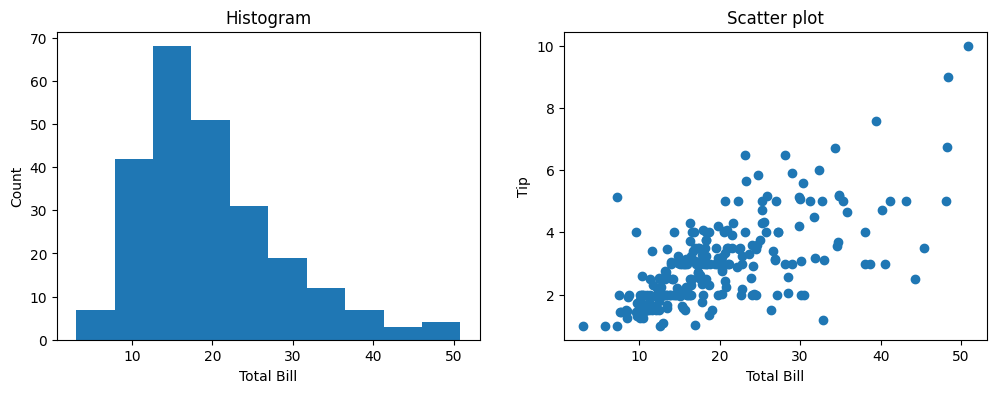

In [9]:
# 1. Figure 생성 + Subplot 추가
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
# fig.set_figwidth(12)

# 2. 왼쪽 축(Axis)에 그래프 그리기 & 옵션
axes[0].hist(x=tips.total_bill)
axes[0].set_title('Histogram')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Count')

# 3. 오른쪽 축(Axis)에 그래프 그리기 & 옵션
axes[1].scatter(x=tips.total_bill, y=tips.tip)
axes[1].set_title('Scatter plot')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Tip')

# 4. 그래프 보여주기
plt.show()

# Box Plot

숫자 타입(int, float) 변수의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값)을 시각화

In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


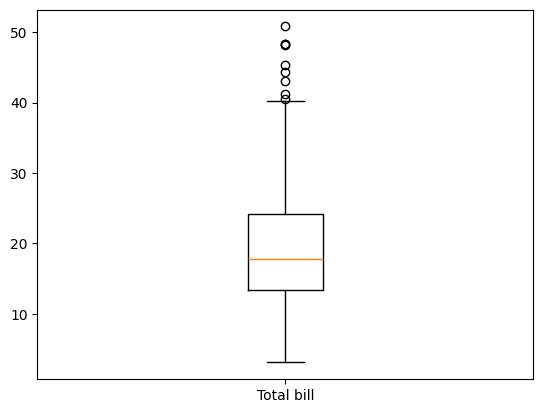

In [15]:
# total_bill box plot
plt.boxplot(x=tips.total_bill, tick_labels=['Total bill'])
plt.show()

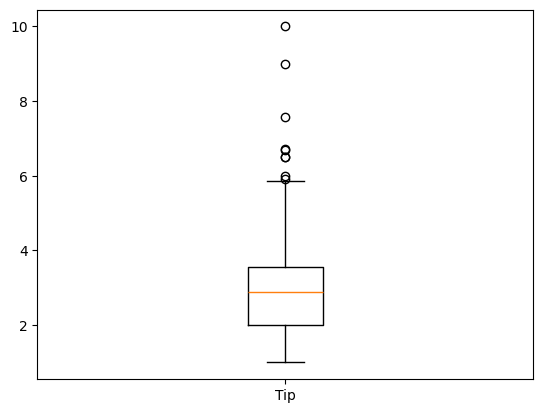

In [16]:
# tip box plot
plt.boxplot(x=tips.tip, tick_labels=['Tip'])
plt.show()

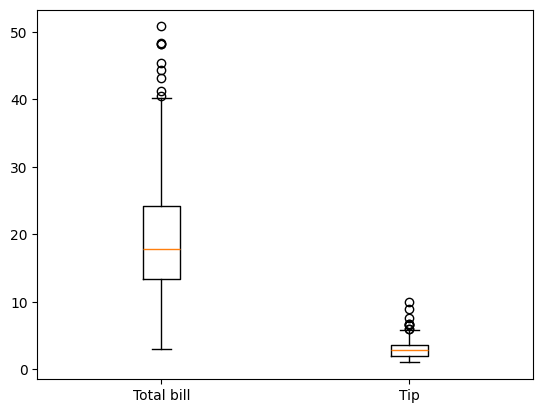

In [18]:
# total_bill과 tip의 box plot을 함께 시각화
plt.boxplot(x=[tips.total_bill, tips.tip], tick_labels=['Total bill', 'Tip'])
plt.show()

1개의 figure를 2개 subplot으로 나누고(좌/우 방향), 각각의 subplot에 total_bill, tip의 box plot을 그리세요.

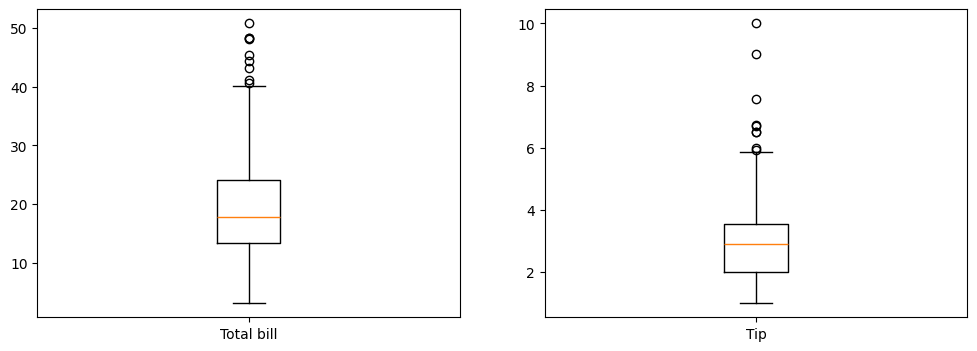

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].boxplot(x=tips.total_bill, tick_labels=['Total bill'])
axes[1].boxplot(x=tips.tip, tick_labels=['Tip'])
plt.show()